In [141]:
import pandas as pd
import numpy as np
import collections

## Load Data

In [142]:
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [143]:
train

,att1,att2,att3,att4,att5,att6,class
0,2.5,besar,hijau,48,77.0,3,A
1,NaN,besar,hijau,36,62.0,3,B
2,1.2,besar,merah,36,63.0,3,A
3,8.2,sedang,biru,12,32.0,2,C
4,4.4,sedang,merah,36,74.0,3,A
5,5.7,kecil,hijau,24,42.0,3,B
6,7.7,kecil,merah,12,20.0,2,C
7,8.5,sedang,merah,24,NaN,3,C
8,10.9,besar,biru,12,16.0,2,C
9,5.8,besar,biru,24,52.0,3,B


## Deteksi Missing Value

In [144]:
print (train['att1'])
print (train['att1'].isnull())
print (train['att2'])
print (train['att2'].isnull())
print (train['att3'])
print (train['att3'].isnull())
print (train['att4'])
print (train['att4'].isnull())
print (train['att5'])
print (train['att5'].isnull())
print (train['att6'])
print (train['att6'].isnull())
print (train.isnull().sum())

0      2.5
1      NaN
2      1.2
3      8.2
4      4.4
5      5.7
6      7.7
7      8.5
8     10.9
9      5.8
10     3.9
Name: att1, dtype: float64
0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: att1, dtype: bool
0      besar
1      besar
2      besar
3     sedang
4     sedang
5      kecil
6      kecil
7     sedang
8      besar
9      besar
10       NaN
Name: att2, dtype: object
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
Name: att2, dtype: bool
0     hijau
1     hijau
2     merah
3      biru
4     merah
5     hijau
6     merah
7     merah
8      biru
9      biru
10    hijau
Name: att3, dtype: object
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: att3, dtype: bool
0     48
1     36
2     36
3     12
4     36
5     24
6  

## Korelasi Data

In [145]:
train.corr()

,att1,att4,att5,att6
att1,1.000000,-0.835726,-0.861561,-0.705669
att4,-0.835726,1.000000,0.962330,0.781929
att5,-0.861561,0.962330,1.000000,0.856644
att6,-0.705669,0.781929,0.856644,1.000000


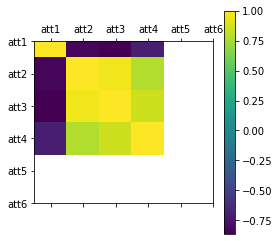

In [146]:
plt.matshow(train.corr())
plt.xticks(range(len(train.columns)-1), train.columns)
plt.yticks(range(len(train.columns)-1), train.columns)
plt.colorbar()
plt.show()

## Encoding Variabel Kategorik

In [147]:
train['att2'] = train['att2'].replace({'besar': 1, 'sedang': 2, 'kecil': 3})
train['att3'] = train['att3'].replace({'hijau': 1, 'merah': 2, 'biru': 3})
train['class'] = train['class'].replace({'A': 1, 'B': 2, 'C': 3})

In [148]:
train

,att1,att2,att3,att4,att5,att6,class
0,2.5,1.0,1,48,77.0,3,1
1,NaN,1.0,1,36,62.0,3,2
2,1.2,1.0,2,36,63.0,3,1
3,8.2,2.0,3,12,32.0,2,3
4,4.4,2.0,2,36,74.0,3,1
5,5.7,3.0,1,24,42.0,3,2
6,7.7,3.0,2,12,20.0,2,3
7,8.5,2.0,2,24,NaN,3,3
8,10.9,1.0,3,12,16.0,2,3
9,5.8,1.0,3,24,52.0,3,2


## Handling Missing Value

In [149]:
from sklearn.preprocessing import MinMaxScaler
train.info()
train = train.fillna({'att1':train['att1'].median()})
train = train.fillna({'att2':train['att2'].median()})
train = train.fillna({'att5':train['att5'].median()})
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
att1     10 non-null float64
att2     10 non-null float64
att3     11 non-null int64
att4     11 non-null int64
att5     10 non-null float64
att6     11 non-null int64
class    11 non-null int64
dtypes: float64(3), int64(4)
memory usage: 744.0 bytes


,att1,att2,att3,att4,att5,att6,class
0,2.50,1.0,1,48,77.0,3,1
1,5.75,1.0,1,36,62.0,3,2
2,1.20,1.0,2,36,63.0,3,1
3,8.20,2.0,3,12,32.0,2,3
4,4.40,2.0,2,36,74.0,3,1
5,5.70,3.0,1,24,42.0,3,2
6,7.70,3.0,2,12,20.0,2,3
7,8.50,2.0,2,24,57.0,3,3
8,10.90,1.0,3,12,16.0,2,3
9,5.80,1.0,3,24,52.0,3,2


## Outlier Boxplot 

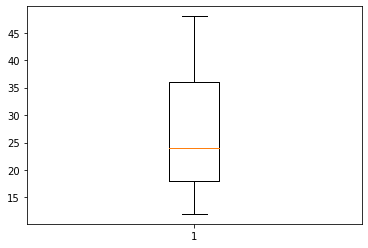

In [150]:
import matplotlib.pyplot as plt
plt.boxplot(train['att4'])
plt.show()

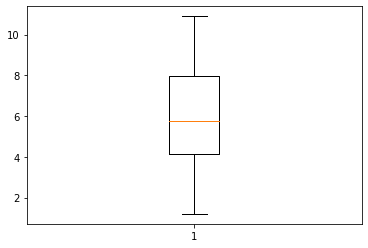

In [151]:
plt.boxplot(train['att1'])
plt.show()

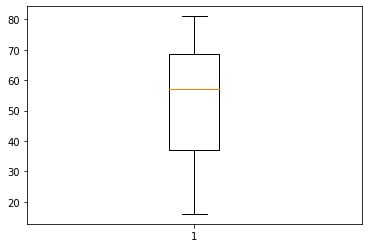

In [152]:
plt.boxplot(train['att5'])
plt.show()

## Split Data 

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
X = train.iloc[:, :-1].values
y = train.iloc[:, 6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train


array([[ 7.7,  3. ,  2. , 12. , 20. ,  2. ],
       [ 3.9,  1.5,  1. , 48. , 81. ,  3. ],
       [ 2.5,  1. ,  1. , 48. , 77. ,  3. ],
       [ 5.8,  1. ,  3. , 24. , 52. ,  3. ],
       [ 8.2,  2. ,  3. , 12. , 32. ,  2. ],
       [ 1.2,  1. ,  2. , 36. , 63. ,  3. ],
       [10.9,  1. ,  3. , 12. , 16. ,  2. ],
       [ 8.5,  2. ,  2. , 24. , 57. ,  3. ]])

In [154]:
X_train.shape

(8, 6)

In [155]:
X_test

array([[ 5.75,  1.  ,  1.  , 36.  , 62.  ,  3.  ],
       [ 5.7 ,  3.  ,  1.  , 24.  , 42.  ,  3.  ],
       [ 4.4 ,  2.  ,  2.  , 36.  , 74.  ,  3.  ]])

In [156]:
X_test.shape

(3, 6)

In [157]:
y_train

array([3, 1, 1, 2, 3, 1, 3, 3], dtype=int64)

In [158]:
y_train.shape

(8,)

In [159]:
y_test

array([2, 2, 1], dtype=int64)

In [160]:
y_test.shape

(3,)

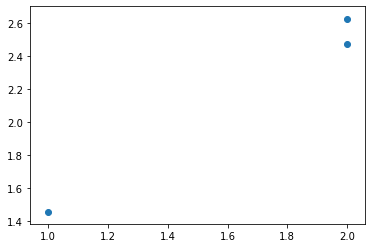

In [161]:
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

## Scaling

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)



[[ 0.51751335  2.10840654 -0.16012815 -1.04257207 -1.28448017 -1.29099445]
 [-0.702053   -0.09166985 -1.44115338  1.4596009   1.34924388  0.77459667]
 [-1.15136691 -0.82502865 -1.44115338  1.4596009   1.17654066  0.77459667]
 [-0.09226982 -0.82502865  1.12089708 -0.20851441  0.09714556  0.77459667]
 [ 0.67798261  0.64168895  1.12089708 -1.04257207 -0.76637052 -1.29099445]
 [-1.56858698 -0.82502865 -0.16012815  0.62554324  0.5720794   0.77459667]
 [ 1.54451659 -0.82502865  1.12089708 -1.04257207 -1.45718339 -1.29099445]
 [ 0.77426416  0.64168895 -0.16012815 -0.20851441  0.31302458  0.77459667]]
[[-0.10831675 -0.82502865 -1.44115338  0.62554324  0.5289036   0.77459667]
 [-0.12436367  2.10840654 -1.44115338 -0.20851441 -0.33461248  0.77459667]
 [-0.54158374  0.64168895 -0.16012815  0.62554324  1.04701325  0.77459667]]


## Implementasi KNN 

In [163]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 1], dtype=int64)

## Evaluasi Performansi

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[1 0 0]
 [1 0 1]
 [0 0 0]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.17      0.33      0.22         3
weighted avg       0.17      0.33      0.22         3

Accuracy: 0.3333333333333333


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Prediksi Data Test 

In [165]:
test['att2'] = test['att2'].replace({'besar': 1, 'sedang': 2, 'kecil': 3})
test['att3'] = test['att3'].replace({'hijau': 1, 'merah': 2, 'biru': 3})
test

,att1,att2,att3,att4,att5,att6,class
0,2.2,2,2,24,91,3,NaN
1,4.5,3,3,24,33,3,NaN
2,6.3,2,2,24,22,2,NaN
3,2.9,1,3,36,76,3,NaN
4,5.6,3,2,24,68,3,NaN
5,7.5,3,1,24,32,3,NaN


In [166]:
test

,att1,att2,att3,att4,att5,att6,class
0,2.2,2,2,24,91,3,NaN
1,4.5,3,3,24,33,3,NaN
2,6.3,2,2,24,22,2,NaN
3,2.9,1,3,36,76,3,NaN
4,5.6,3,2,24,68,3,NaN
5,7.5,3,1,24,32,3,NaN


In [167]:
X_train = train.iloc[:, :-1].values
X_test = test.iloc[:, :-1].values
y_train = train.iloc[:, 6].values
y_test = test.iloc[:, 6].values

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 3, 1, 1, 3], dtype=int64)

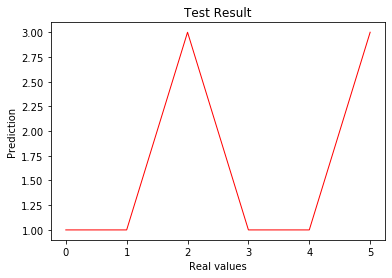

In [168]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_pred, color='red', linewidth=1)
plt.title('Test Result')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()